In [5]:
import json
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from evaluate_util import get_model, plot_model_output
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
experiments_of_interest = ["2024_07_27__10_39_50_topunet_eval_finalTest"]
experiments_labels = ["baseline", "topunet", "topological loss, very narrow"]
experiments_colors = [("b", "cornflowerblue"), ("green", "limegreen"), ("orangered", "coral")]
exp_paths = ["experiments/" + name for name in experiments_of_interest]

In [7]:
# patches = []
# labels = []
# width = 0.1
# shift_factor = width*1.1
# 
# fig = plt.figure()
# ax = fig.add_subplot()
# 
# for i in range(len(experiments_of_interest)):
#     with open(exp_paths[i] + "/diameters.pickle", "rb") as handle:
#         diameters = pickle.load(handle)
# 
#     cdr_label = [diameters["label"][0][i] / diameters["label"][1][i] for i in range(len(diameters["label"][0]))]
#     cdr_pred = [diameters["pred"][0][i] / diameters["pred"][1][i] for i in range(len(diameters["label"][0]))]
#     data = [abs(cdr_pred[i] - cdr_label[i]) for i in range(len(cdr_pred))]
#     violin = ax.violinplot(data,
#                             positions = [0 + shift_factor*i],
#                             widths=width,
#                             showmeans=True,
#                             side="high")
# 
#     for pc in violin['bodies']:
#         pc.set_facecolor(experiments_colors[i][0])
#         pc.set_edgecolor(experiments_colors[i][0])
#     for partname in ('cbars','cmins','cmaxes'):
#         vp = violin[partname]
#         vp.set_edgecolor(experiments_colors[i][0])
#     patches.append(mpatches.Patch(color=experiments_colors[i][0]))
#     labels.append(experiments_labels[i])
# 
# ax.set_xticks([0], [""])
# plt.ylabel("MAE of vCDRs")
# plt.legend(patches, labels, loc=8) # loc 4 ... lower center
# plt.show()

C:\Users\michi\Documents\Uni\_Master\_Thesis\project\venv\lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(

[[metatensor(0.0243), metatensor(0.0024), metatensor(0.), metatensor(0.), metatensor(0.0140), metatensor(0.0033), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.0072), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.0067), metatensor(0.), metatensor(0.0300), metatensor(0.0154), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.0024), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.0037), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.0058), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.0248), metatensor(0.), metatensor(0.0021), metatensor(0.), metatensor(0.0043), metatensor(0.), metatensor(0.0084), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.), metatensor(0.0063), metate

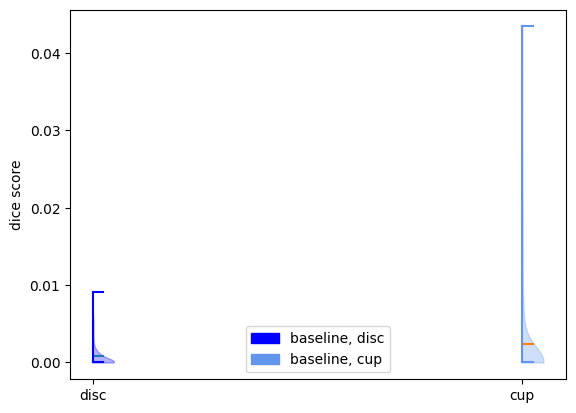

In [11]:
patches = []
labels = []
width = 0.1
shift_factor = width*1.1

fig = plt.figure()
ax = fig.add_subplot()

for i in range(len(experiments_of_interest)):
    with open(exp_paths[i] + "/dice.pickle", "rb") as handle:
        data = pickle.load(handle)
    violin = ax.violinplot(data[1],
                            positions = [0 + shift_factor*i],
                            widths=width,
                            showmeans=True,
                            side="high")

    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][0])
        pc.set_edgecolor(experiments_colors[i][0])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][0])
    patches.append(mpatches.Patch(color=experiments_colors[i][0]))
    labels.append(experiments_labels[i] + ", disc")

    violin = ax.violinplot(data[0],
                            positions = [1 + i*shift_factor],
                            widths=width,
                            showmeans=True,
                            side="high")
    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][1])
        pc.set_edgecolor(experiments_colors[i][1])
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin[partname]
        vp.set_edgecolor(experiments_colors[i][1])
    patches.append(mpatches.Patch(color=experiments_colors[i][1]))
    labels.append(experiments_labels[i] + ", cup")
ax.set_xticks([0, 1], ["disc", "cup"])
plt.ylabel("dice score")
plt.legend(patches, labels, loc=8) # loc 4 ... lower center
plt.show()